In [1]:
# ! pip install -r requirements.txt
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
mkt_data = pd.read_csv('data/mkt_data.csv')
mkt_data.head(10)

,id,send_date,estimated_age,age_range,channel,coupon,clicked,last_step,nb_units,order_value
0,1,2019-04-12,59,46-60,SMS,2,0,received,0,0
1,2,2019-04-08,27,18-30,Email,2,0,received,0,0
2,3,2019-04-05,74,60+,Email,2,0,received,0,0
3,4,2019-04-21,32,31-45,SMS,2,0,received,0,0
4,5,2019-04-28,42,31-45,Email,2,0,received,0,0
5,6,2019-04-02,25,18-30,Email,4,0,received,0,0
6,7,2019-04-06,26,18-30,Email,2,0,received,0,0
7,8,2019-04-03,47,46-60,Email,6,0,received,0,0
8,9,2019-04-05,38,31-45,Email,6,0,received,0,0
9,10,2019-04-14,20,18-30,SMS,6,0,received,0,0


In [3]:
mkt_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300000 entries, 0 to 299999
Data columns (total 10 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   id             300000 non-null  int64 
 1   send_date      300000 non-null  object
 2   estimated_age  300000 non-null  int64 
 3   age_range      300000 non-null  object
 4   channel        300000 non-null  object
 5   coupon         300000 non-null  int64 
 6   clicked        300000 non-null  int64 
 7   last_step      300000 non-null  object
 8   nb_units       300000 non-null  int64 
 9   order_value    300000 non-null  int64 
dtypes: int64(6), object(4)
memory usage: 22.9+ MB


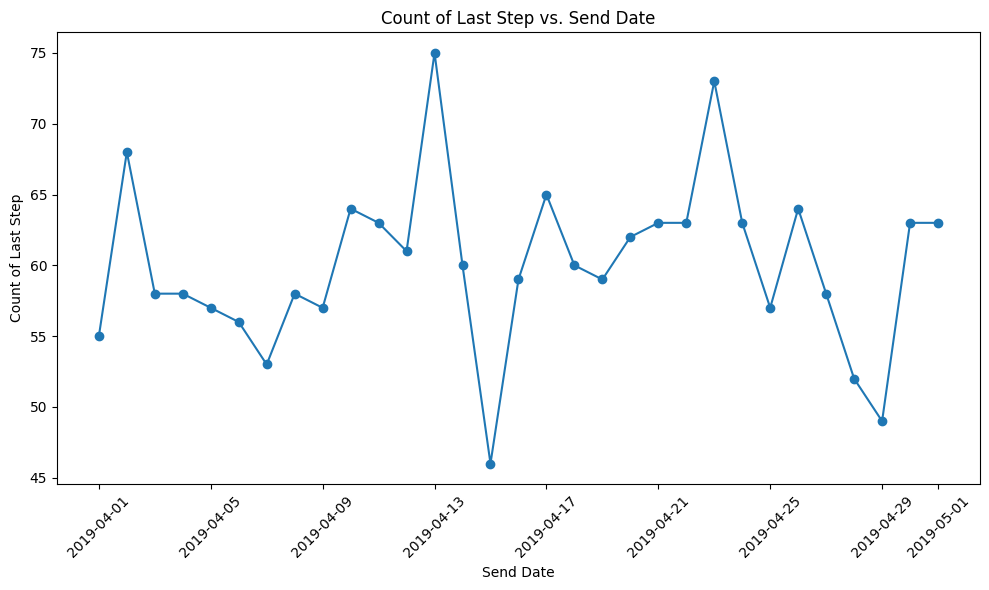

In [4]:
mkt_data['send_date'] = pd.to_datetime(mkt_data['send_date'])
mkt_data.set_index('send_date', inplace=True)

# Group by 'send_date' and count occurrences of 'last_step'
df_grouped = mkt_data[mkt_data['last_step'] == 'purchased'].resample('D').count().reset_index()

# Plot the count against 'send_date'
plt.figure(figsize=(10, 6))
plt.plot(df_grouped['send_date'], df_grouped['last_step'], marker='o')
plt.xlabel('Send Date')
plt.ylabel('Count of Last Step')
plt.title('Count of Last Step vs. Send Date')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()